<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

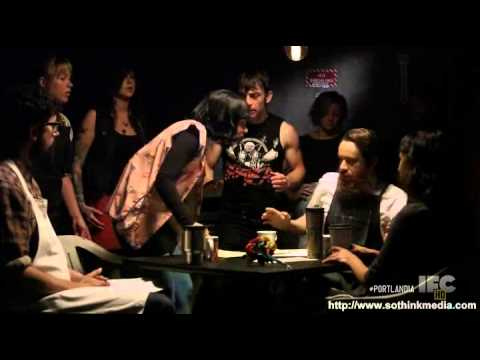

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\ethan\\Desktop\\projects\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [51]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [52]:
'''Imports I like Jon-Cody's style so I copied directly'''
# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

In [53]:
#copied Jon's function but because I would have done the same thing
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    
    tokens = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [54]:
#Analyzing value counts to see if there are any one word reviews
shops['full_review_text'].value_counts(normalize=True).head()

 10/6/2016 First to Review The Factory is AWESOME! What a great spot! I had the chicken and waffles (new take, but I now have cravings for them!), the homemade Poptart was so fun and such a delight. In terms of beverages got the drink with the chicory in it (I'm a big chicory fan) and it was perfect!                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [55]:
# I wanted to tokenize all of the reviews and look at shops head to make sure I did it right.
shops['tokens'] = shops['full_review_text'].apply(tokenize)
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,"[11252016, 1, checkin, love, love, loved, the,..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"[1222016, listed, in, date, night, austin, amb..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,"[11302016, 1, checkin, listed, in, brunch, spo..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,"[11252016, very, cool, decor, good, drinks, ni..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,"[1232016, 1, checkin, they, are, located, with..."


### Analyzing the tokens

In [56]:
'''Word/Token count'''
# Import counter
from collections import Counter
 
word_counts = Counter()
shops['tokens'].apply(lambda x: word_counts.update(x))
# 10 most common words
word_counts.most_common(10)

[('the', 34809),
 ('and', 26650),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546)]

In [57]:
# Function that returns df of word counts
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [58]:
wc = count(shops['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
28,the,6847,34809,1.0,0.044537,0.044537,0.899028
72,and,6864,26650,2.0,0.034098,0.078634,0.901261
9,a,6246,22755,3.0,0.029114,0.107748,0.820116
10,i,5528,20237,4.0,0.025892,0.133641,0.725840
63,to,5653,17164,5.0,0.021961,0.155601,0.742253


In [84]:
#Filtering the dataframe to the good and bad coffee shops

good_shop = shops[(shops['star_rating'] == ' 5.0 star rating ') | (shops['star_rating'] == ' 4.0 star rating ')]
bad_shop = shops[(shops['star_rating'] == ' 1.0 star rating ') | (shops['star_rating'] == ' 2.0 star rating ') | (shops['star_rating'] == ' 3.0 star rating ')]

In [83]:
good_shop['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
Name: star_rating, dtype: int64

In [85]:
bad_shop['star_rating'].value_counts()

 3.0 star rating     738
 2.0 star rating     460
 1.0 star rating     278
Name: star_rating, dtype: int64

In [86]:
nlp = spacy.load("en_core_web_lg")

# Instantiate tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [130]:
# Additional stop words
STOP_WORDS = nlp.Defaults.stop_words.union(['like','good','pretty','great','coffee','place','definitely','austin',' ', "don't", '1',"little",'-','I','check-in', 'i', "I'm","i'm","i've", "it", "it's", 'it.', 'the', 'this',])

In [131]:
# taking out stop words
tokens = []

for doc in tokenizer.pipe(good_shop['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
good_shop['tokens'] = tokens

C:\Users\ethan\Anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [132]:
wc_good = count(good_shop['tokens'])
wc_good.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
11,love,1263,1604,1.0,0.005698,0.005698,0.205700
226,nice,962,1101,2.0,0.003911,0.009610,0.156678
363,best,951,1093,3.0,0.003883,0.013493,0.154886
179,friendly,986,1014,4.0,0.003602,0.017095,0.160586
354,food,826,994,5.0,0.003531,0.020627,0.134528
492,time,835,994,6.0,0.003531,0.024158,0.135993
33,latte,713,949,7.0,0.003371,0.027529,0.116124
0,got,743,947,8.0,0.003364,0.030894,0.121010
314,check-ins,929,930,9.0,0.003304,0.034198,0.151303
15,shop,775,910,10.0,0.003233,0.037431,0.126221


In [133]:
# Additional stop words
STOP_WORDS = nlp.Defaults.stop_words.union(['like','good','pretty','great','coffee','place','definitely','austin',' ', "don't", '1',"little",'-','I','check-in', 'i', "I'm","i'm","i've", "it", "it's", 'it.', 'the', 'this',])

In [134]:
# taking out stop words
tokens = []

for doc in tokenizer.pipe(bad_shop['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
bad_shop['tokens'] = tokens

C:\Users\ethan\Anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [135]:
wc_bad = count(bad_shop['tokens'])
wc_bad.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
45,food,266,369,1.0,0.004578,0.004578,0.180217
258,time,264,351,2.0,0.004354,0.008932,0.178862
527,people,247,327,3.0,0.004057,0.012988,0.167344
10,service,261,314,4.0,0.003895,0.016884,0.176829
1,got,237,300,5.0,0.003722,0.020605,0.160569
354,ordered,240,296,6.0,0.003672,0.024277,0.162602
473,didn't,222,292,7.0,0.003622,0.027899,0.150407
55,come,234,285,8.0,0.003535,0.031435,0.158537
19,nice,226,267,9.0,0.003312,0.034747,0.153117
380,order,174,253,10.0,0.003139,0.037886,0.117886


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


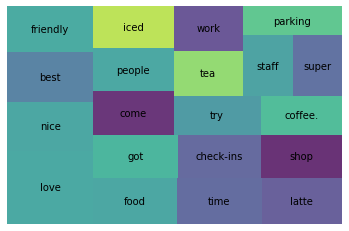

In [136]:
# Good words
wc_top20_good = wc_good[wc_good['rank'] <= 20]

squarify.plot(sizes=wc_top20_good['pct_total'], label=wc_top20_good['word'], alpha=.8 )
plt.axis('off')
plt.show()

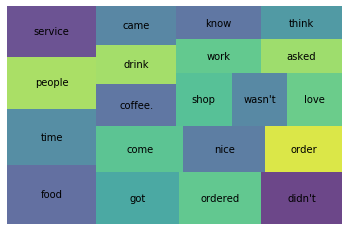

In [137]:
#Bad words
wc_top20_bad = wc_bad[wc_bad['rank'] <= 20]

squarify.plot(sizes=wc_top20_bad['pct_total'], label=wc_top20_bad['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Official Report

Most of the good shops had positive words like nice, friendly etc. Both shops had words such as like, good, great, etc. But good shops had atmospheric words while bad shops had things like service, didn't, order, come etc. Good shops tend to have better atmospheres with good customer service and bad shops have no atmospher with service issues. 

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

